# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('neo_v2.csv') #Establishes my dataframe

print("\n--- Quick Data Inspection (First 5 Rows) ---") #Gives a quick preview of 5 rows from dataframe
print(df.head()) 

print("\n--- Data Structure Overview ---") #Gives detailed information on the dataframe
df.info()


--- Quick Data Inspection (First 5 Rows) ---
        id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2            

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [27]:

#Numerical summaries to understand distributions and spot possible outliers.
print("\n--- Summary Statistics ---")
print(df.describe())

# --- Missing Values ---
print("\n--- Missing Values by Column ---")
print(df.isnull().sum())


# --- Summary Statistics for Numeric Columns ---
print("\n--- Summary Statistics (Numeric Columns) ---")
print(df.describe())


# --- Data Types ---
print("\n--- Data Types ---")
print(df.dtypes)


# --- Range Checks (Numeric Columns) ---
print("\n--- Diameter Range ---")
print("Min est_diameter_min:", df['est_diameter_min'].min())
print("Max est_diameter_max:", df['est_diameter_max'].max())

print("\n--- Velocity Range ---")
print("Min relative_velocity:", df['relative_velocity'].min())
print("Max relative_velocity:", df['relative_velocity'].max())

print("\n--- Miss Distance Range ---")
print("Min miss_distance:", df['miss_distance'].min())
print("Max miss_distance:", df['miss_distance'].max())

print("\n--- Absolute Magnitude Range ---")
print("Min absolute_magnitude:", df['absolute_magnitude'].min())
print("Max absolute_magnitude:", df['absolute_magnitude'].max())


# --- Categorical Columns (Unique Values Only Where Helpful) ---
print("\n--- Unique Values in 'hazardous' ---")
print(df['hazardous'].unique())

print("\n--- Unique Values in 'orbiting_body' ---")
print(df['orbiting_body'].unique())

print("\n--- Unique Values in 'sentry_object' ---")
print(df['sentry_object'].unique())

# Extract the 4-digit year that appears right after an opening parenthesis
df['year'] = df['name'].str.extract(r'\((\d{4})')

# Convert to numeric (turns missing into NaN)
df['year'] = pd.to_numeric(df['year'], errors='coerce')

print(df[['name', 'year']].head())



--- Summary Statistics ---
                 id  est_diameter_min  est_diameter_max  relative_velocity  \
count  9.083600e+04      90836.000000      90836.000000       90836.000000   
mean   1.438288e+07          0.127432          0.284947       48066.918918   
std    2.087202e+07          0.298511          0.667491       25293.296961   
min    2.000433e+06          0.000609          0.001362         203.346433   
25%    3.448110e+06          0.019256          0.043057       28619.020645   
50%    3.748362e+06          0.048368          0.108153       44190.117890   
75%    3.884023e+06          0.143402          0.320656       62923.604633   
max    5.427591e+07         37.892650         84.730541      236990.128088   

       miss_distance  absolute_magnitude  
count   9.083600e+04        90836.000000  
mean    3.706655e+07           23.527103  
std     2.235204e+07            2.894086  
min     6.745533e+03            9.230000  
25%     1.721082e+07           21.340000  
50%     3.7

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

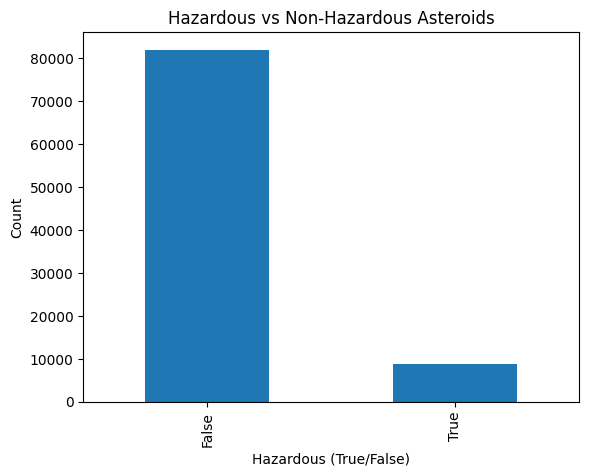

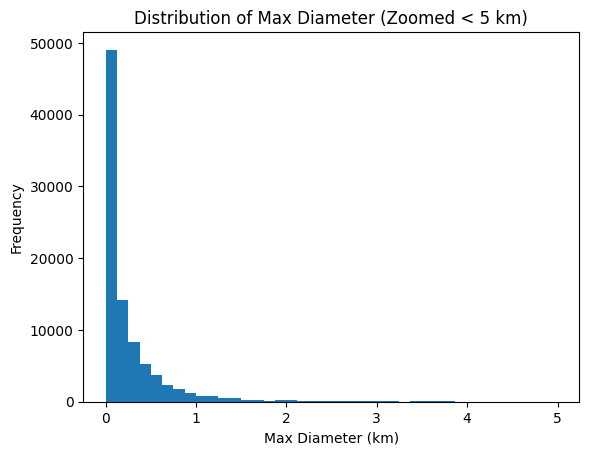

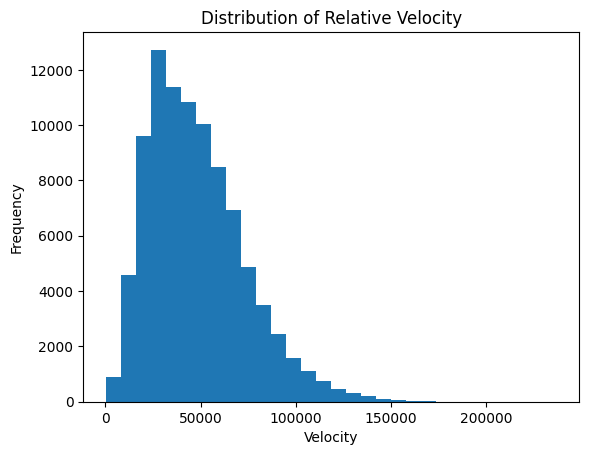

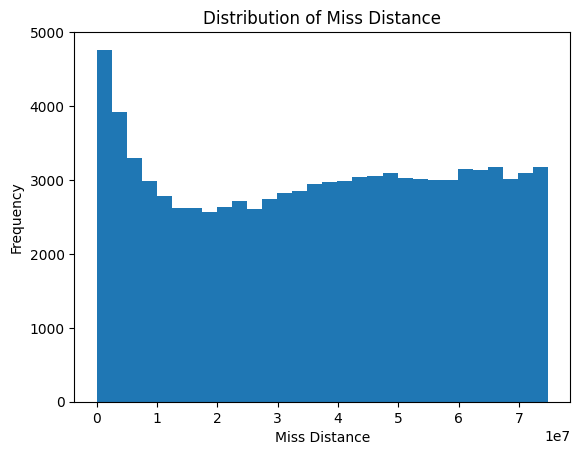

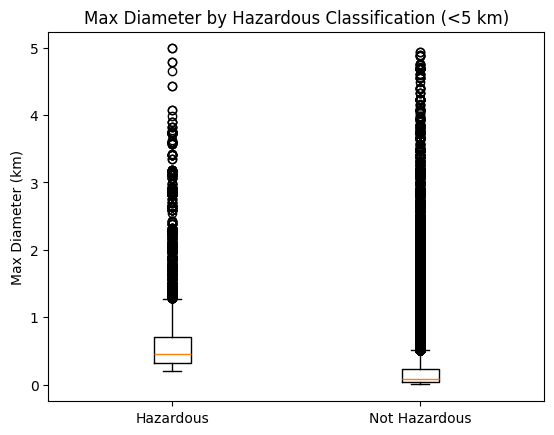

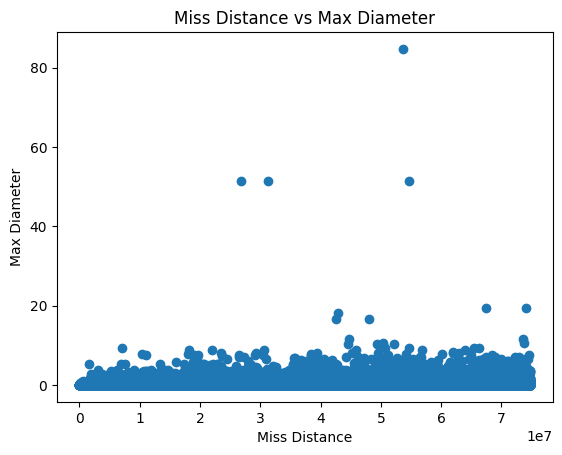

In [28]:
# I want to see how many objects are hazardous compared to non-hazardous.
# This tells me if the dataset is balanced or if one group is way bigger.
df['hazardous'].value_counts().plot(kind='bar')
plt.title("Hazardous vs Non-Hazardous Asteroids")
plt.xlabel("Hazardous (True/False)")
plt.ylabel("Count")
plt.show()

# I want to see how big most asteroids are.
# A histogram shows me if sizes have a normal shape or if they are skewed.
plt.hist(df[df['est_diameter_max'] < 5]['est_diameter_max'], bins=40)
plt.title("Distribution of Max Diameter (Zoomed < 5 km)")
plt.xlabel("Max Diameter (km)")
plt.ylabel("Frequency")
plt.show()

# I want to understand how fast asteroids are moving.
# This helps show normal speeds and any extreme outliers.
plt.hist(df['relative_velocity'], bins=30)
plt.title("Distribution of Relative Velocity")
plt.xlabel("Velocity")
plt.ylabel("Frequency")
plt.show()

# I want to see how close these NEOs come to Earth.
# A histogram helps me see if most pass far away or if some get close.
plt.hist(df['miss_distance'], bins=30)
plt.title("Distribution of Miss Distance")
plt.xlabel("Miss Distance")
plt.ylabel("Frequency")
plt.show()

# I want to compare sizes between hazardous and non-hazardous objects.
# Boxplots show medians and spread.
df_small = df[df['est_diameter_max'] < 5]

plt.boxplot([
    df_small[df_small['hazardous'] == True]['est_diameter_max'],
    df_small[df_small['hazardous'] == False]['est_diameter_max']
])
plt.xticks([1, 2], ['Hazardous', 'Not Hazardous'])
plt.title("Max Diameter by Hazardous Classification (<5 km)")
plt.ylabel("Max Diameter (km)")
plt.show()


# I want to see if bigger asteroids tend to pass closer or farther.
# A scatterplot shows if there's any pattern in the relationship.
plt.scatter(df['miss_distance'], df['est_diameter_max'])
plt.title("Miss Distance vs Max Diameter")
plt.xlabel("Miss Distance")
plt.ylabel("Max Diameter")
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
The diameter values are extremely skewed. Most asteroids are very small (<1 km), but a few outliers are huge (40–85 km). Hazardous vs non-hazardous diameters looked almost the same. Hazardous asteroids were not dramatically larger on average, which might be unexpected.

2. Do you have any concerns about your dataset? 
A few extremely large diameter values dominate plots and can hide the overall distribution unless filtered. There are far more “Not Hazardous” objects than “Hazardous,” which may impact any modeling

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
Convert miss distance and relative velocity into numeric types. Extract the year reliably from the name using the parentheses pattern. 